In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
YO_MEASLES_VACCINE_INTRODUCTION = 1963

In [4]:
original_df = pd.read_csv("us_contagious_diseases.csv")
original_df.head()

,Unnamed: 0,disease,state,year,weeks_reporting,count,population
0,1,Hepatitis A,Alabama,1966,50,321,3345787.0
1,2,Hepatitis A,Alabama,1967,49,291,3364130.0
2,3,Hepatitis A,Alabama,1968,52,314,3386068.0
3,4,Hepatitis A,Alabama,1969,49,380,3412450.0
4,5,Hepatitis A,Alabama,1970,51,413,3444165.0


In [5]:
filtr = (original_df.disease == "Measles") & (original_df.state != "Hawaii") & (original_df.state != "Alaska")
print(f"Diseases {original_df.disease.unique()} consists of {len(original_df)} records")
df = original_df[filtr]
# pytanie co chcemy, liczbę zgłoszeń czy liczbę zgłoszonych zakażeń
print(f"Diseases {df.disease.unique()} consists of {len(df)} records for all states except Hawaii and Alaska")
print(f"Diseases {df.disease.unique()} consists of {df.loc[filtr, 'count'].sum()} records for all states except Hawaii and Alaska")


Diseases ['Hepatitis A' 'Measles' 'Mumps' 'Pertussis' 'Polio' 'Rubella' 'Smallpox'] consists of 16065 records
Diseases ['Measles'] consists of 3675 records for all states except Hawaii and Alaska
Diseases ['Measles'] consists of 18609117 records for all states except Hawaii and Alaska


In [6]:
states = df.state.unique()
pd.options.mode.chained_assignment = None  # default='warn'
df["estimated avg per 100k"] = round(df["count"] / df["weeks_reporting"] * 52 / (df["population"] / 100000)).fillna(0).astype(int)
pd.options.mode.chained_assignment = "warn"
df

,Unnamed: 0,disease,state,year,weeks_reporting,count,population,estimated avg per 100k
2346,2347,Measles,Alabama,1928,52,8843,2589923.0,341
2347,2348,Measles,Alabama,1929,49,2959,2619131.0,120
2348,2349,Measles,Alabama,1930,52,4156,2646248.0,157
2349,2350,Measles,Alabama,1931,49,8934,2670818.0,355
2350,2351,Measles,Alabama,1932,41,270,2693027.0,13
...,...,...,...,...,...,...,...,...
6166,6167,Measles,Wyoming,1998,0,0,479897.0,0
6167,6168,Measles,Wyoming,1999,0,0,486758.0,0
6168,6169,Measles,Wyoming,2000,0,0,493782.0,0
6169,6170,Measles,Wyoming,2001,0,0,500794.0,0


In [7]:
fig = px.line(df, 
        x="year", y="estimated avg per 100k", color='state')
fig.show()

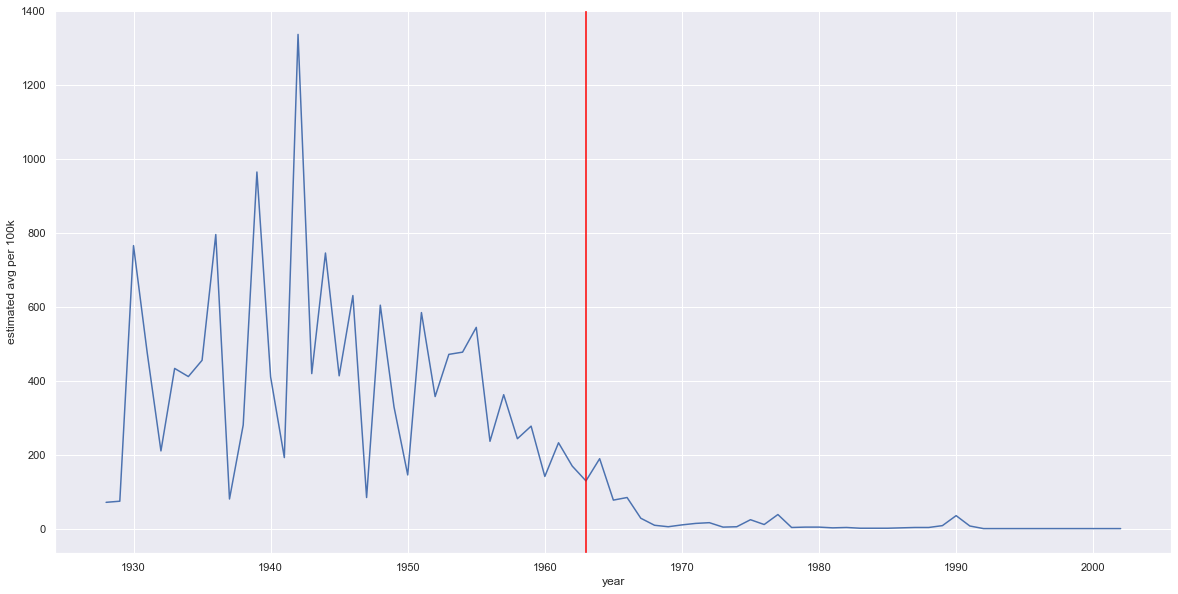

In [14]:
# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20, 10)})

# Plot the lines on two facets
plot = sns.lineplot(
    data=df[df['state']=='California'],
    x="year", y="estimated avg per 100k")
plot.axvline(YO_MEASLES_VACCINE_INTRODUCTION, color = 'red', label = 'introduction of vaccine')